In [1]:
from os.path import join as pjoin
from os import listdir
from datetime import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rankdata, ttest_ind

from evaluate import get_nan_percent, get_performance, tolerant_mean, plot_nan_percent

In [2]:
bookkeeping_path = ('session_info.csv')

mouse_codes = []
dates = []
versions = []
performances = []
session_indices = np.array([], dtype=int)

for mouse_code in listdir('data'):
    mice_path = pjoin('data', mouse_code)

    cur_mouse_code = []
    cur_date = []
    cur_version = []
    cur_performance = []

    for session in listdir(mice_path):
        date_version = '.'.join(session.split('.')[:-1])
        date = date_version.split('-')[0]
        version = date_version.split('-')[1]
        session_path = pjoin(mice_path, session)
        session_data = pd.read_csv(session_path)
        leftP = session_data['leftP']
        choices = session_data['choices']
        if len(choices) < 100:
            continue
        try:
            performance = get_performance(choices=choices, leftP=leftP, version=version)
        except RuntimeError:
            continue
        cur_mouse_code.append(mouse_code)
        cur_date.append(date)
        cur_version.append(version)
        cur_performance.append(performance)
        
    cur_session_indices = rankdata(cur_date).astype(int)
    mouse_codes += cur_mouse_code
    dates += cur_date
    performances += cur_performance
    versions += cur_version
    session_indices = np.concatenate((session_indices, cur_session_indices))

data = pd.DataFrame({'mouse_code': mouse_codes, 
                    'date': dates,
                    'performance': performances,
                    'version': versions,
                    'session_index': session_indices})

data.to_csv(bookkeeping_path, index=False)

## Setting The Trial limit for motor_training, training_1, training_2 and data collection

### Motor training limit

elbo is %d 404


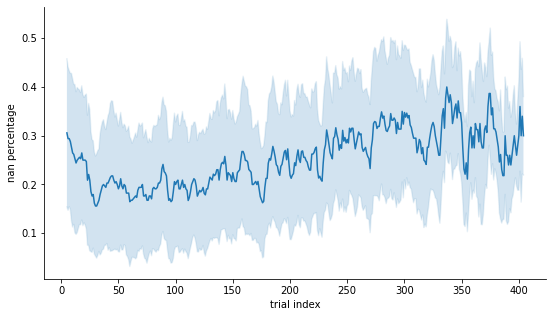

68


In [3]:
data = pd.read_csv('session_info.csv')
# only the v10 trials
filtered = data[['10' in v for v in data.version]]
choices = []

for ind, session in filtered.iterrows():
    session_path = pjoin('data', session['mouse_code'],'-'.join([session['date'], session['version']]) + '.csv')
    session_data = pd.read_csv(session_path)
    choices.append(get_nan_percent(session_data['choices'].to_numpy().flatten()))

plot_nan_percent(choices)
print(len(choices))

elbo is %d 488


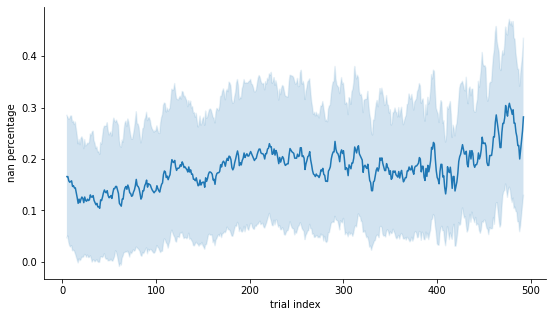

146


In [4]:
data = pd.read_csv('session_info.csv')
# only the v10 trials
filtered = data[['21' in v for v in data.version]]
choices = []

for ind, session in filtered.iterrows():
    session_path = pjoin('data', session['mouse_code'],'-'.join([session['date'], session['version']]) + '.csv')
    session_data = pd.read_csv(session_path)
    choices.append(get_nan_percent(session_data['choices'].to_numpy().flatten()))

plot_nan_percent(choices)
print(len(choices))

elbo is %d 533


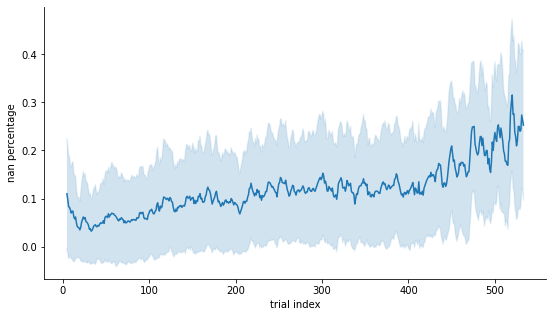

149


In [5]:
data = pd.read_csv('session_info.csv')
# only the v10 trials
filtered = data[['20' in v for v in data.version]]
choices = []

for ind, session in filtered.iterrows():
    session_path = pjoin('data', session['mouse_code'],'-'.join([session['date'], session['version']]) + '.csv')
    session_data = pd.read_csv(session_path)
    choices.append(get_nan_percent(session_data['choices'].to_numpy().flatten()))

plot_nan_percent(choices)
print(len(choices))

elbo is %d 544


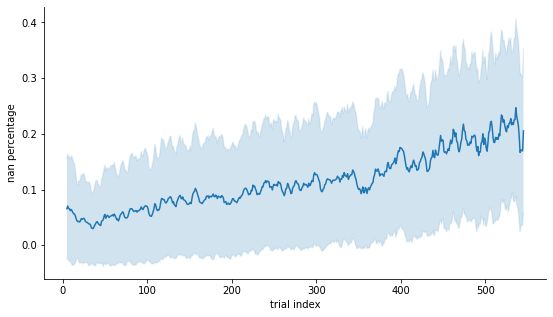

293


In [6]:
data = pd.read_csv('session_info.csv')
# only the v10 trials
filtered = data[data.session_index > 30]
choices = []

for ind, session in filtered.iterrows():
    session_path = pjoin('data', session['mouse_code'],'-'.join([session['date'], session['version']]) + '.csv')
    session_data = pd.read_csv(session_path)
    choices.append(get_nan_percent(session_data['choices'].to_numpy().flatten()))

plot_nan_percent(choices)
print(len(choices))

## Benchmark motor training with V10 data

32
36


Text(0.5, 1.0, 'V10 performance')

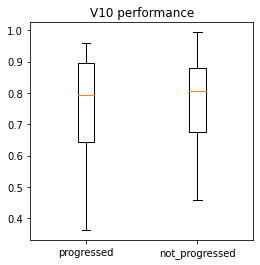

In [12]:
data = pd.read_csv('session_info.csv')

not_progressed = ['APPPS1_4', 'APPPS1_5', 'JGED07', 'JGED04', 'AKED07']
progressed = ['APPPS1_1', 'JGED01', 'JGED03', 'JGED08', 'JGED22', 'JGED23', 'JGED24']

v10_not_progressed = data[['10' in v for v in data.version]]
v10_not_progressed = v10_not_progressed[[x in not_progressed for x in v10_not_progressed.mouse_code]]
print(len(v10_not_progressed))

v10_progressed = data[['10' in v for v in data.version]]
v10_progressed = v10_progressed[[x in progressed for x in v10_progressed.mouse_code]]
print(len(v10_progressed))

performance_progressed = []
performance_not_progressed = []

for animal in progressed:
    best = 0
    for ind, session in v10_progressed[v10_progressed.mouse_code == animal].iterrows():
        session_path = pjoin('data', session['mouse_code'],'-'.join([session['date'], session['version']]) + '.csv')
        session_data = pd.read_csv(session_path)
        choices = session_data['choices'].to_numpy().flatten()[:300]
        leftP = session_data['leftP'].to_numpy().flatten()[:300]
        perf = get_performance(choices, leftP, session.version)
        if perf > best:
            best = perf
        performance_progressed.append(perf)
    

for animal in not_progressed:
    best = 0
    for ind, session in v10_not_progressed[v10_not_progressed.mouse_code == animal].iterrows():
        session_path = pjoin('data', session['mouse_code'],'-'.join([session['date'], session['version']]) + '.csv')
        session_data = pd.read_csv(session_path)
        choices = session_data['choices'].to_numpy().flatten()[:300]
        leftP = session_data['leftP'].to_numpy().flatten()[:300]
        perf = get_performance(choices, leftP, session.version)
        if perf > best:
            best = perf
        performance_not_progressed.append(perf)

data_to_plot = [performance_progressed, performance_not_progressed]

fig, ax = plt.subplots(figsize=(4, 4))
ax.boxplot(data_to_plot)
ax.set_xticklabels(['progressed', 'not_progressed'])
ax.set_title('V10 performance')

In [8]:
ttest_ind(a=performance_progressed, b=performance_not_progressed)

Ttest_indResult(statistic=-0.3255891400830666, pvalue=0.7457652272211317)

70
76


Text(0.5, 1.0, 'V21 performance comparison')

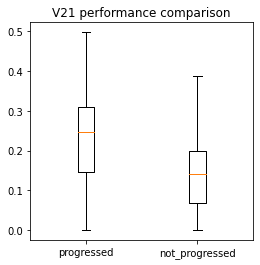

In [9]:
data = pd.read_csv('session_info.csv')

not_progressed = ['APPPS1_4', 'APPPS1_5', 'JGED07', 'JGED04', 'AKED07']
progressed = ['APPPS1_1', 'JGED01', 'JGED03', 'JGED08', 'JGED22', 'JGED23', 'JGED24']

v21_not_progressed = data[['21' in v for v in data.version]]
v21_not_progressed = v21_not_progressed[[x in not_progressed for x in v21_not_progressed.mouse_code]]
print(len(v21_not_progressed))

v21_progressed = data[['21' in v for v in data.version]]
v21_progressed = v21_progressed[[x in progressed for x in v21_progressed.mouse_code]]
print(len(v21_progressed))

performance_progressed = []
performance_not_progressed = []

for animal in progressed:
    best = 0
    for ind, session in v21_progressed[v21_progressed.mouse_code == animal].iterrows():
        session_path = pjoin('data', session['mouse_code'],'-'.join([session['date'], session['version']]) + '.csv')
        session_data = pd.read_csv(session_path)
        choices = session_data['choices'].to_numpy().flatten()[:400]
        leftP = session_data['leftP'].to_numpy().flatten()[:400]
        perf = get_performance(choices, leftP, session.version)
        if perf > best:
            best = perf
        performance_progressed.append(perf)
    

for animal in not_progressed:
    best = 0
    for ind, session in v21_not_progressed[v21_not_progressed.mouse_code == animal].iterrows():
        session_path = pjoin('data', session['mouse_code'],'-'.join([session['date'], session['version']]) + '.csv')
        session_data = pd.read_csv(session_path)
        choices = session_data['choices'].to_numpy().flatten()[:400]
        leftP = session_data['leftP'].to_numpy().flatten()[:400]
        perf = get_performance(choices, leftP, session.version)
        if perf > best:
            best = perf
        performance_not_progressed.append(perf)

data_to_plot = [performance_progressed, performance_not_progressed]

fig, ax = plt.subplots(figsize=(4, 4))
ax.boxplot(data_to_plot)
ax.set_xticklabels(['progressed', 'not_progressed'])
ax.set_title('V21 performance comparison')

In [10]:
ttest_ind(a=performance_progressed, b=performance_not_progressed)

Ttest_indResult(statistic=5.33299485664163, pvalue=3.659439316850393e-07)